In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [20]:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [21]:
def calculate_bmi(state: BMIState) -> BMIState:
    state["bmi"] = state["weight_kg"] / (state["height_m"] ** 2)
    return state

In [28]:
def classify_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        state['category'] = "Underweight"
    elif bmi < 25:
        state['category'] = "Normal weight"
    elif bmi < 30:
        state['category'] = "Overweight"
    else:
        state['category'] = "Obesity"

    return state

In [29]:
graph = StateGraph(BMIState)

#Adding nodes
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("classify_bmi", classify_bmi)

#Adding edges
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "classify_bmi")
graph.add_edge("classify_bmi", END)

workflow = graph.compile()

In [30]:
initial_state = {"height_m": 1.85, "weight_kg":80}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.85, 'bmi': 23.37472607742878, 'category': 'Normal weight'}


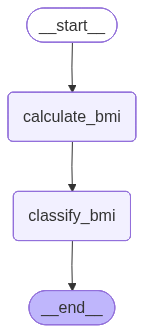

In [31]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())